# Machine Learning Course - Project.

## Part 2: Unsupervised Learning - Clustering Text or Images

### Library Imports

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("data/movies.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
print(df.shape[0],"records", df.shape[1], "columns")

50000 records 2 columns


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'])  # Assuming sentiment column contains labels
plt.title("Distribution of Sentiment Labels")
plt.show()

The dataset consists of 50,000 IMDB movie reviews with two columns:

review: The text of the movie review.

sentiment: The sentiment label (positive/negative).

In [10]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

In [11]:
X_tfidf = vectorizer.fit_transform(df["review"])

In [13]:
# Finding the optimal number of clusters using the silhouette score
scores = []
clusters_range = range(2, 10)  # Testing clusters from 2 to 10

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, labels)
    scores.append(score)


In [15]:
# Find the best k based on silhouette score
optimal_k = clusters_range[np.argmax(scores)]
optimal_k

2

In [18]:
# Compute inertia for different values of k
inertia_values = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia_values.append(kmeans.inertia_)



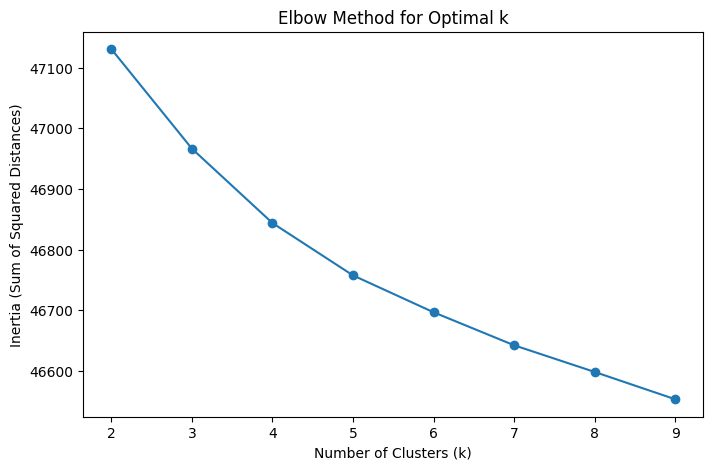

In [21]:
# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

In [20]:
df["Cluster"] = kmeans.fit_predict(X_tfidf)

In [22]:
# Check cluster distribution
print(df["Cluster"].value_counts())

Cluster
0    30412
1    19588
Name: count, dtype: int64


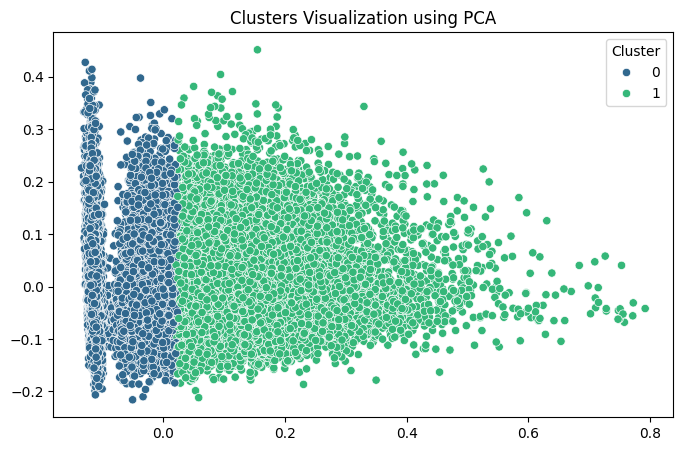

In [23]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="viridis")
plt.title("Clusters Visualization using PCA")
plt.show()


Cluster 0 is more dense and compact than cluster 1 which is more spread. They're clearly well clustered.